In [1]:
import numpy as np
import pandas as pd
import pylab
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

/Users/sam/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from sklearn.pipeline import Pipeline
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('lr', LinearRegression())])

In [4]:
df = pd.read_csv('data/cruise_ship_info.csv')
print(df.dtypes)
df.head()

Ship_name             object
Cruise_line           object
Age                    int64
Tonnage              float64
passengers           float64
length               float64
cabins               float64
passenger_density    float64
crew                 float64
dtype: object


,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


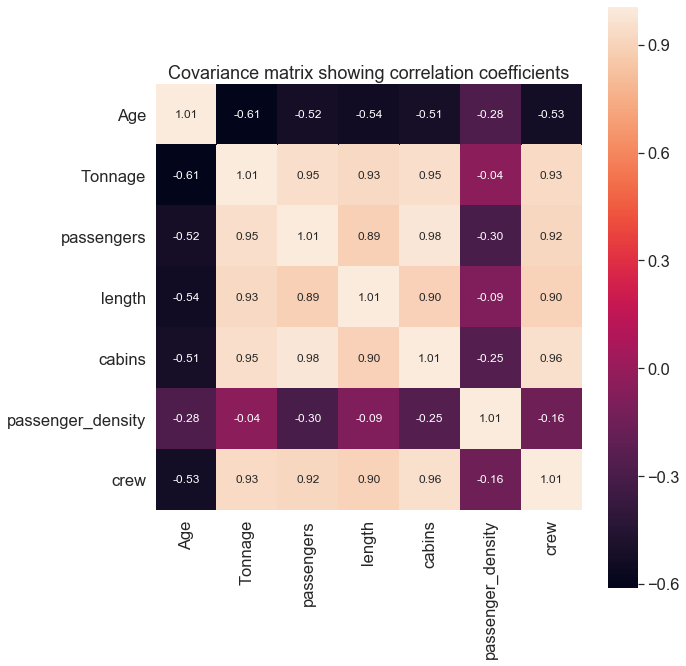

In [15]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 yticklabels=cols,
                 xticklabels=cols)
plt.title('Covariance matrix showing correlation coefficients')
plt.tight_layout()
plt.show()

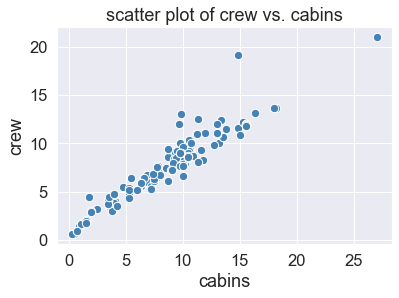

In [23]:
X = df['cabins']
y = df['crew']
plt.scatter(X,y,c='steelblue', edgecolor='white', s=70)
plt.xlabel('cabins')
plt.ylabel('crew')
plt.title('scatter plot of crew vs. cabins')
plt.show()

In [24]:
z = np.polyfit(X,y,1)
p = np.poly1d(z)
print(p)

 
0.745 x + 1.216


In [25]:
y_pred_numpy = p(X)
R2_numpy = 1 - ((y-y_pred_numpy)**2).sum()/((y-y.mean())**2).sum()
print(R2_numpy)

0.9040636287611352


In [26]:
print(r2_score(y, y_pred_numpy))

0.9040636287611352


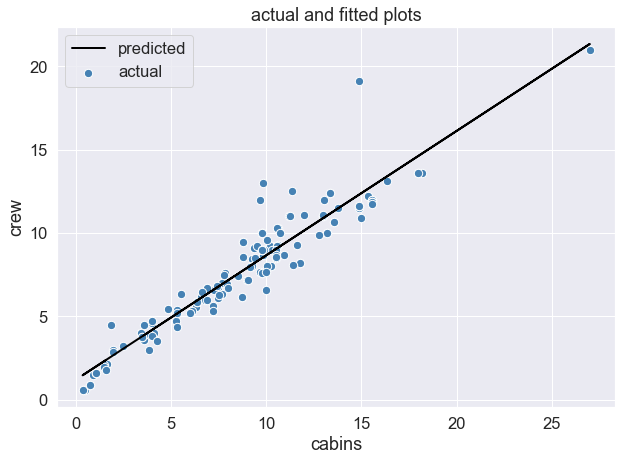

In [27]:
plt.figure(figsize=(10,7))
plt.scatter(X,y,c='steelblue', edgecolor='white', s=70, 
             label='actual')
plt.plot(X,y_pred_numpy, color='black', lw=2, label='predicted')
plt.xlabel('cabins')
plt.ylabel('crew')
plt.title('actual and fitted plots')
plt.legend()
plt.show()

In [28]:
degree = 1
model= pylab.polyfit(X,y,degree)
print(model)

[0.7449974  1.21585013]


In [29]:
y_pred_pylab = pylab.polyval(model,X)
R2_pylab = 1 - ((y-y_pred_pylab)**2).sum()/((y-y.mean())**2).sum()
print(R2_pylab)

0.9040636287611352


In [30]:
print(r2_score(y, y_pred_pylab))

0.9040636287611352


In [31]:
lr = LinearRegression()
lr.fit(X.values.reshape(-1,1),y)
print(lr.coef_)
print(lr.intercept_)

[0.7449974]
1.2158501299368654


In [32]:
y_pred_sklearn = lr.predict(X.values.reshape(-1,1))
R2_sklearn = 1 - ((y-y_pred_sklearn)**2).sum()/((y-y.mean())**2).sum()
print(R2_sklearn)

0.9040636287611352


In [33]:
print(r2_score(y, y_pred_sklearn))

0.9040636287611352


In [34]:
cols_selected = ['Tonnage', 'passengers', 'length', 'cabins','crew']
df[cols_selected].head()
X = df[cols_selected].iloc[:,0:4].values    # features matrix 
y = df[cols_selected]['crew'].values        # target variable

In [35]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=0)
sc_y = StandardScaler()
y_train_std = sc_y.fit_transform(y_train[:,np.newaxis]).flatten()
pipe_lr.fit(X_train, y_train_std)
y_train_pred = sc_y.inverse_transform(pipe_lr.predict(X_train))
y_test_pred = sc_y.inverse_transform(pipe_lr.predict(X_test))
r2_score_train = r2_score(y_train, y_train_pred)
r2_score_test = r2_score(y_test, y_test_pred)
print('R2 train for lr: %.3f' % r2_score_train)
print('R2 test for lr:  %.3f ' % r2_score_test)

R2 train for lr: 0.912
R2 test for lr:  0.958 


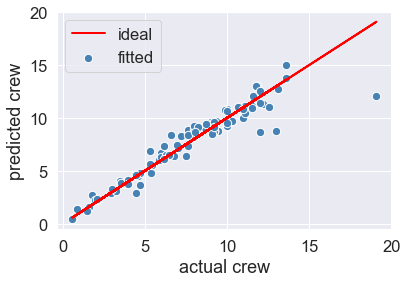

In [36]:
plt.scatter(y_train, y_train_pred, c='steelblue', edgecolor='white', s=70, label='fitted')
plt.plot(y_train, y_train, c = 'red', lw = 2,label='ideal')
plt.xlabel('actual crew')
plt.ylabel('predicted crew')
plt.legend()
plt.show()